In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#read the file
movie_data_df = pd.read_csv("Resources/data.csv")
movie_data_df

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."


In [3]:
#rename the movie name column
movie_data_df= movie_data_df.rename(columns={"Year of Release" : "Year",
                                            "Run Time in minutes" : "Run Time(mins)",
                                            "Movie Rating": "Rating"})
movie_data_df.head()

,Unnamed: 0,Movie Name,Year,Run Time(mins),Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [4]:
#create new df for usable data
movie_reduced_df = movie_data_df[["Movie Name", "Year", "Run Time(mins)", "Rating", "Gross"]]
print(movie_reduced_df.count())
movie_reduced_df

Movie Name        10000
Year              10000
Run Time(mins)    10000
Rating            10000
Gross              7085
dtype: int64


,Movie Name,Year,Run Time(mins),Rating,Gross
0,The Shawshank Redemption,1994,142,9.3,28340000.0
1,The Godfather,1972,175,9.2,134970000.0
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,NaN
3,The Chaos Class,1975,87,9.2,NaN
4,The Dark Knight,2008,152,9.0,534860000.0
...,...,...,...,...,...
9995,Golmaal Again,2017,140,4.9,1010000.0
9996,Not to Forget,2021,84,4.9,NaN
9997,Housefull 3,2016,140,4.9,1160000.0
9998,A.I. Rising,2018,85,4.9,NaN


In [5]:
movie_cleaned_df = movie_reduced_df.dropna(how="any")
print(movie_cleaned_df.count())
movie_cleaned_df.head()

Movie Name        7085
Year              7085
Run Time(mins)    7085
Rating            7085
Gross             7085
dtype: int64


,Movie Name,Year,Run Time(mins),Rating,Gross
0,The Shawshank Redemption,1994,142,9.3,28340000.0
1,The Godfather,1972,175,9.2,134970000.0
4,The Dark Knight,2008,152,9.0,534860000.0
5,Schindler's List,1993,195,9.0,96900000.0
6,The Lord of the Rings: The Return of the King,2003,201,9.0,377850000.0


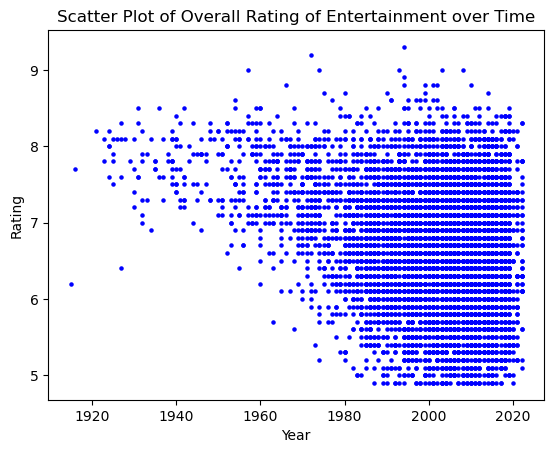

In [6]:
#scatter plot time :D

fig1, ax1 = plt.subplots()
plt.scatter(movie_cleaned_df['Year'],movie_cleaned_df['Rating'], marker = 'o', color = 'blue', s = 5)
plt.title("Scatter Plot of Overall Rating of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

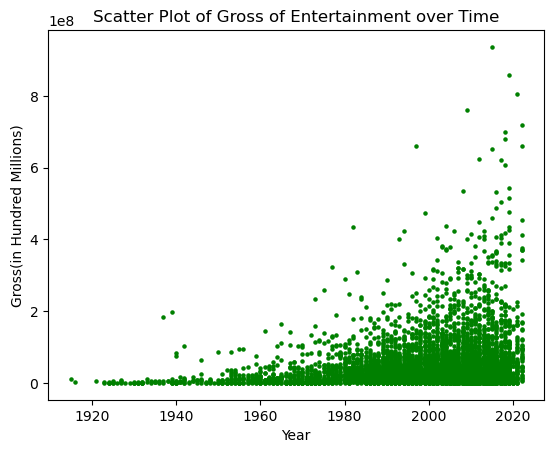

0.0
936660000.0


In [7]:
#scatter plot of total Gross per year
fig1, ax1 = plt.subplots()
plt.scatter(movie_cleaned_df['Year'],movie_cleaned_df['Gross'], marker = 'o', color = 'green', s = 5)
plt.title("Scatter Plot of Gross of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Gross(in Hundred Millions)")
plt.show()
print(movie_cleaned_df['Gross'].min())
print(movie_cleaned_df['Gross'].max())

In [8]:
movies_per_year = movie_cleaned_df.groupby(['Year']).size().reset_index()
movies_per_year

,Year,0
0,1915,1
1,1916,1
2,1921,1
3,1923,2
4,1924,4
...,...,...
98,2018,217
99,2019,142
100,2020,31
101,2021,45


In [9]:
movies_per_year.columns = ["Year", "Number of Movies"]
movies_per_year

,Year,Number of Movies
0,1915,1
1,1916,1
2,1921,1
3,1923,2
4,1924,4
...,...,...
98,2018,217
99,2019,142
100,2020,31
101,2021,45


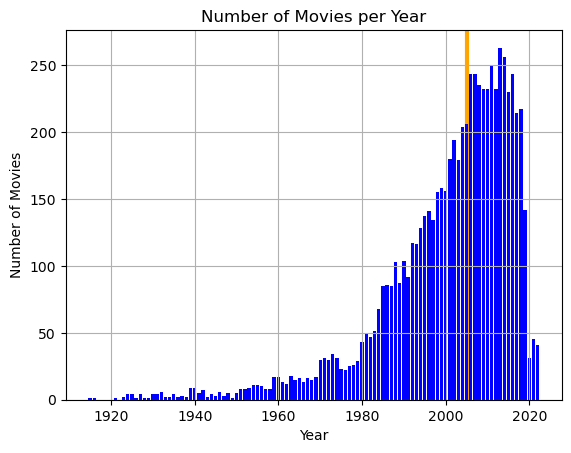

2005.0

In [10]:
x_value = movies_per_year["Year"]
y_value = movies_per_year["Number of Movies"]
plt.bar(x_value, y_value, color = "blue")
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid()
plt.axvline(x = 2005, c= "orange", linewidth=3, zorder=0)
plt.show()
median_year = movie_cleaned_df["Year"].median()
median_year

In [11]:
#finding Avg Gross per Year
gross_per_year = movie_cleaned_df.groupby(['Year'])[["Gross"]].mean().reset_index()
gross_per_year.head()

,Year,Gross
0,1915,10000000.0
1,1916,2180000.0
2,1921,5450000.0
3,1923,1265000.0
4,1924,677500.0


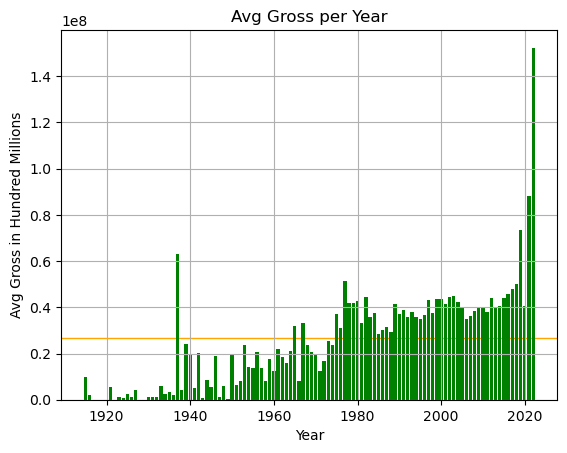

In [12]:
#avg gross bar graph
x_value = gross_per_year["Year"]
y_value = gross_per_year["Gross"]
plt.bar(x_value, y_value, color = "green")
plt.axhline(y=gross_per_year["Gross"].mean(), c= "orange", linewidth=1, zorder=0)
plt.title("Avg Gross per Year")
plt.xlabel("Year")
plt.ylabel("Avg Gross in Hundred Millions")
plt.grid()
plt.show()

In [13]:
# finding avg rating per year
avg_data = movie_cleaned_df.groupby(['Year'])[["Rating"]].mean().reset_index()
avg_data

,Year,Rating
0,1915,6.200000
1,1916,7.700000
2,1921,8.200000
3,1923,7.950000
4,1924,7.950000
...,...,...
98,2018,6.630876
99,2019,6.626761
100,2020,6.232258
101,2021,6.560000


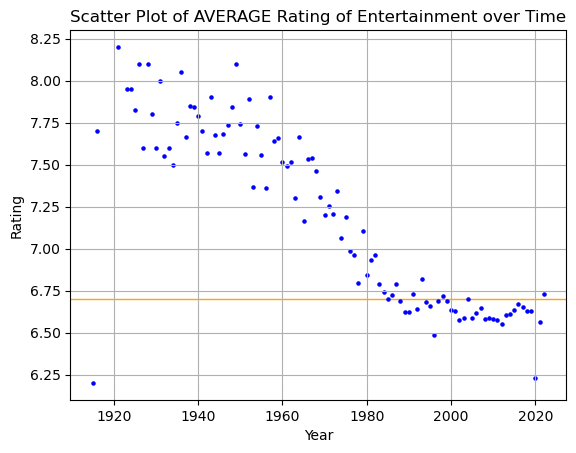

In [14]:
fig1, ax1 = plt.subplots()
plt.scatter(avg_data['Year'],avg_data['Rating'], marker = 'o', color = 'blue', s = 5)
plt.axhline(y=6.70, c= "orange", linewidth=1, zorder=0)
plt.title("Scatter Plot of AVERAGE Rating of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid()
plt.show()

In [15]:
#Pie chart for over/under mean
mean_rating_overall = movie_cleaned_df["Rating"].mean()
bins = [0, mean_rating_overall, 10]
group_labels = ["Poor Quality(below)", "Good Quality(above)"]
pd.cut(movie_cleaned_df["Rating"], bins, labels=group_labels)

0       Good Quality(above)
1       Good Quality(above)
4       Good Quality(above)
5       Good Quality(above)
6       Good Quality(above)
               ...         
9989    Poor Quality(below)
9990    Poor Quality(below)
9992    Poor Quality(below)
9995    Poor Quality(below)
9997    Poor Quality(below)
Name: Rating, Length: 7085, dtype: category
Categories (2, object): ['Poor Quality(below)' < 'Good Quality(above)']

In [16]:
movie_cleaned_df["Rating Group"] = pd.cut(movie_cleaned_df["Rating"], bins, labels=group_labels)
movie_cleaned_df.head()

/var/folders/8s/n12fp0ls2xqgs15hs84q23sr0000gn/T/ipykernel_49798/3319432692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaned_df["Rating Group"] = pd.cut(movie_cleaned_df["Rating"], bins, labels=group_labels)


,Movie Name,Year,Run Time(mins),Rating,Gross,Rating Group
0,The Shawshank Redemption,1994,142,9.3,28340000.0,Good Quality(above)
1,The Godfather,1972,175,9.2,134970000.0,Good Quality(above)
4,The Dark Knight,2008,152,9.0,534860000.0,Good Quality(above)
5,Schindler's List,1993,195,9.0,96900000.0,Good Quality(above)
6,The Lord of the Rings: The Return of the King,2003,201,9.0,377850000.0,Good Quality(above)


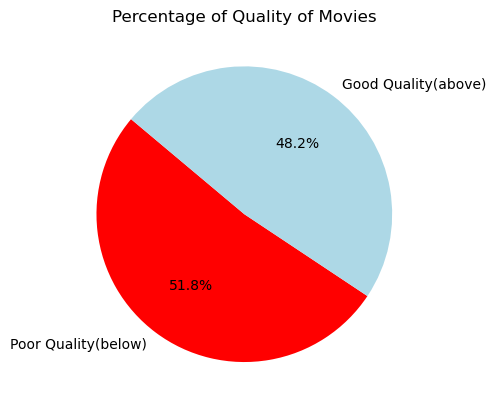

2005.0

In [17]:
rating_count = movie_cleaned_df["Rating Group"].value_counts()
plt.pie(rating_count, labels= rating_count.index, colors= ["red", "lightblue"], autopct= '%1.1f%%', startangle=140)
plt.title("Percentage of Quality of Movies")
plt.show()
median_year = movie_cleaned_df["Year"].median()
median_year

In [18]:
year_bins = [1915, 1969, 2023]
year_labels = ["Early Period", "Recent"]
pd.cut(movie_cleaned_df["Year"], year_bins, labels=year_labels)

0       Recent
1       Recent
4       Recent
5       Recent
6       Recent
         ...  
9989    Recent
9990    Recent
9992    Recent
9995    Recent
9997    Recent
Name: Year, Length: 7085, dtype: category
Categories (2, object): ['Early Period' < 'Recent']

In [19]:
movie_cleaned_df["Year Group"] = pd.cut(movie_cleaned_df["Year"], year_bins, labels=year_labels)
movie_cleaned_df.head()

/var/folders/8s/n12fp0ls2xqgs15hs84q23sr0000gn/T/ipykernel_49798/3695349196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cleaned_df["Year Group"] = pd.cut(movie_cleaned_df["Year"], year_bins, labels=year_labels)


,Movie Name,Year,Run Time(mins),Rating,Gross,Rating Group,Year Group
0,The Shawshank Redemption,1994,142,9.3,28340000.0,Good Quality(above),Recent
1,The Godfather,1972,175,9.2,134970000.0,Good Quality(above),Recent
4,The Dark Knight,2008,152,9.0,534860000.0,Good Quality(above),Recent
5,Schindler's List,1993,195,9.0,96900000.0,Good Quality(above),Recent
6,The Lord of the Rings: The Return of the King,2003,201,9.0,377850000.0,Good Quality(above),Recent


In [20]:
early_df = movie_cleaned_df.loc[movie_cleaned_df["Year Group"] == "Early Period", :]
early_df.head()

,Movie Name,Year,Run Time(mins),Rating,Gross,Rating Group,Year Group
7,12 Angry Men,1957,96,9.0,4360000.0,Good Quality(above),Early Period
21,"The Good, the Bad and the Ugly",1966,178,8.8,6100000.0,Good Quality(above),Early Period
60,Seven Samurai,1954,207,8.6,270000.0,Good Quality(above),Early Period
76,Psycho,1960,109,8.5,32000000.0,Good Quality(above),Early Period
83,Casablanca,1942,102,8.5,1020000.0,Good Quality(above),Early Period


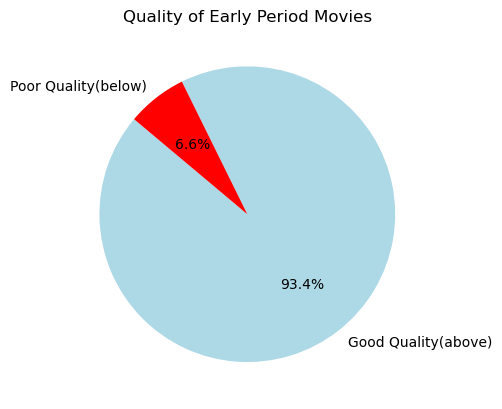

In [21]:
rating_early_count = early_df["Rating Group"].value_counts()
plt.pie(rating_early_count, labels= rating_early_count.index, colors= ["lightblue", "red"], autopct= '%1.1f%%', startangle=140)
plt.title("Quality of Early Period Movies")
plt.show()

In [22]:
recent_df = movie_cleaned_df.loc[movie_cleaned_df["Year Group"] == "Recent", :]
recent_df.head()

,Movie Name,Year,Run Time(mins),Rating,Gross,Rating Group,Year Group
0,The Shawshank Redemption,1994,142,9.3,28340000.0,Good Quality(above),Recent
1,The Godfather,1972,175,9.2,134970000.0,Good Quality(above),Recent
4,The Dark Knight,2008,152,9.0,534860000.0,Good Quality(above),Recent
5,Schindler's List,1993,195,9.0,96900000.0,Good Quality(above),Recent
6,The Lord of the Rings: The Return of the King,2003,201,9.0,377850000.0,Good Quality(above),Recent


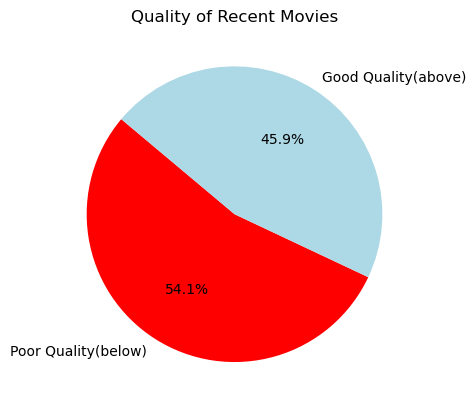

In [23]:
rating_recent_count = recent_df["Rating Group"].value_counts()
plt.pie(rating_recent_count, labels= rating_recent_count.index, colors= ["red", "lightblue"], autopct= '%1.1f%%', startangle=140)
plt.title("Quality of Recent Movies")
plt.show()

In [24]:
#linear regression
def linear_regress(x, y, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y, marker = 'o', color = 'blue', s = 5)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is: {pvalue}")

The r-value is: -0.8668179924621057
The p-value is: 2.719835163770518e-32


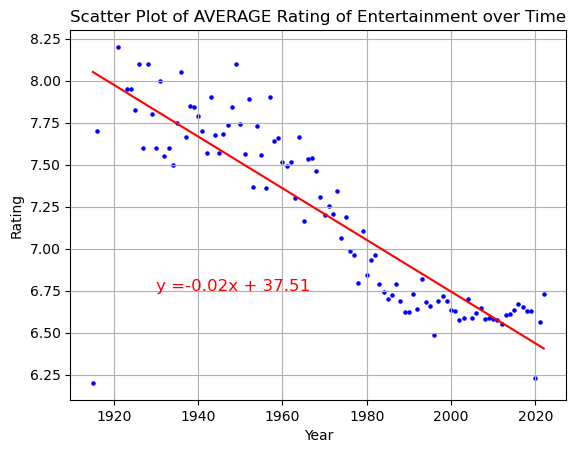

In [25]:
x = avg_data['Year']
y = avg_data['Rating']
linear_regress(x, y, (1930,6.75))
plt.title("Scatter Plot of AVERAGE Rating of Entertainment over Time")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.grid()
plt.show()